### Simulated annealing

Z uporabo metahevrističnega algoritma preverjamo našo hipotezo o grafih z največjo sigma nepravilnostjo.

Opis algoritma:

- Glej pdf iz spletne - stran 6
- Soseščina bo predstavljena kot grafi, kjer vozlišču odvzamemo povezavo in do dve povezavi dodamo. 
- Ohlajanje bo po principu: T(k+1) = \alpha * T(k), \alpha in (0,1)
- Verjetnost izbire slabše možnosti bo izračunana z Boltzmanovo porazdelitvijo

In [19]:
# importing necessary libraries
import random
import math
from itertools import combinations

# function for generating random neighbour of graph G
def random_neighbour(G):
    # get node
    N = G.vertices()[randrange(G.order())]
    # remove one edge of node N
    if len(G.neighbors(N)) != 0:
        G.delete_edge(N, G.neighbors(N)[randrange(len(list(G.neighbors(N))))])
    
    # add up to two edges
    k = 0 # max number of iterations counter
    # i is 0, 1 or 2, depending on probability (0: .4, 1: .45, 2: .15)
    i = 0
    if random.random() > .4:
        i += 1
        if random.random() > .75:
            i += 1
    j = 0 # counter for number of added edges
    while k < 8 and j < i:
        k += 1
        # new node
        V = G.vertices()[randrange(G.order())]
        if V == N or V in G.neighbors(N): # if node is N or is already connected to N, we skip it
            continue
        G.add_edge(N, V)
        
        # is triangle free
        if G.triangles_count() != 0:
            G.delete_edge(N, V) # if its not triangle free, we remove the edge that we added
        else: 
            j += 1
            continue

    return G # we return random neighbour

In [20]:
# sigma total irr, our f(s)
def sigma_irr(G):
    return sum((u - v) ** 2 for u, v in combinations(G.degree(), 2))

In [21]:
# simulated annealing - main function (our initial solution, initial temperature, max. it., factor for T. decay)
def simulated_anneling(inital_G, T_0, max_iterations_without_improvement, alpha):
    G = initial_G.copy() # set G
    Best = G.copy() # set current best
    T = T_0 # set initial temperature
    num_of_it_without_improvement = 0 # counter for iterations without improvement
    current_sigma_total_irr = sigma_irr(G)  # sigma value for current graph
    
    while num_of_it_without_improvement < max_iterations_without_improvement:
        
        G_mod = random_neighbour(G) # new solution

        # check, whether its better
        if sigma_irr(G_mod) > current_sigma_total_irr:
            G = G_mod # if it's better, set as current
            current_sigma_total_irr = sigma_irr(G) # update current sigma value
            num_of_it_without_improvement = 0 # reset counter for i.w.i.

        # choose worse option nonetheless with certain probability
        else:
            num_of_it_without_improvement += 1 # we didn't have improvement

            # get probability with Boltzmann distribution
            p = math.exp(-(current_sigma_total_irr - sigma_irr(G_mod)) / T)

            
            if random.random() < p: # accept change
                G = G_mod
                current_sigma_total_irr = sigma_irr(G)
        
        # if its better, save as best
        if sigma_irr(G) > sigma_irr(Best):
            Best = G.copy()
        
        # update Temperature
        T = alpha * T
    
    return Best, G # return best solution and last option

### Pridobivanje prve rešitve

In [22]:
# generate star graph with max sigma total irr. (in center there can be multiple vertices)
def generate_max_sigma_star_graph(n):
    
    # generate star graph with or order n and c central vertices
    def generate_star_graph(n, c):
        graph = {} # dict. of neighbours
        i = 0
        for k in range(n): 
            i += 1
            if i <= c: # if vertex is central, set outer vertices as neighbors
                graph[k] = list(range(c, n))
            else: # else vertex is outer, set central vertices as neighbors
                graph[k] = list(range(c))
        
        return Graph(graph)


    max_sigma = 0 # for keeping maximum sigma value
    max_sigma_graphs = [] # list of graphs with maximum sigma value

    # check all graphs, where number of central nodes varies
    for c in range(1, round(n/2)):
        G = generate_star_graph(n, c) # get star graph
        sigma = sigma_irr(G) # get sigma value of star graph

        if sigma > max_sigma: # update if its the best
            max_sigma_graphs = [G]
            max_sigma = sigma
        elif sigma == max_sigma: # if equal, just append
            max_sigma_graphs.append(G)
    
    return max_sigma_graphs # return all graphs with max sigma value

### Poganjanje algoritmov - zaenkrat samo testiranje

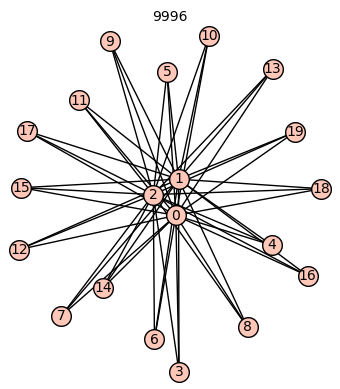

9996 9276
9996 8564
9996 8336
9996 8296
9996 8564
9996 8564
9996 8256
9996 8296
9996 8944
9996 8644
9996 8644
9996 8604
9996 8604
9996 8984
9996 8296
9996 8256
9996 8336
9996 8764
9996 9316
9996 8904
9996 8644
9996 8644
9996 8644
9996 8296
9996 8604
9996 8216
9996 8644
9996 8644
9996 8644
9996 8256
9996 8764
9996 8944
9996 8296
9996 8944
9996 7944
9996 8216
9996 8604
9996 8564
9996 8944
9996 8564
9996 8296
9996 8296
9996 8644
9996 8684
9996 8944
9996 8216
9996 8944
9996 8644
9996 9640
9996 9276


In [23]:
n = 20

alpha = .6
initial_G = generate_max_sigma_star_graph(n)
initial_G.show(title=f"{sigma_irr(initial_G)}")
T_0 = 1000
max_iterations_without_improvement = 5

for i in range(50):
    Best, G = simulated_anneling(initial_G, T_0, max_iterations_without_improvement, alpha)
    #G.show(title=f"{sigma_irr(G)}")
    print(sigma_irr(Best), sigma_irr(G))

